In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
file_name = 'D:\\Springboard_Capstone2\\CapstoneDataset\\NewData\\YouTubeDataSet.csv'
df=pd.read_csv(file_name, encoding='utf-8')
df = df.dropna()
df.head()

,video_id,trending_date,title_description,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22.0,2017-11-13T17:13:01.000Z,SHANtell martin,748374.0,57527.0,2966.0,15954.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22.0,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966.0,2486.0,184.0,532.0,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22.0,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053.0,4451.0,1772.0,895.0,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22.0,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062.0,7250.0,217.0,456.0,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22.0,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430.0,115426.0,1110.0,6541.0,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs


In [20]:
Likes = df['likes'].values
Dislikes = df['dislikes'].values
Views = df['views'].values
Comment_Count = df['comment_count']

###### Null Hypothesis: The true mean of any two groups under test is the same

###### Alternative Hypothesis: The true mean of any two groups under test is not the same.

##### Foolowing is a Bootstrap Sample Test to test the above Null Hypothesis: 

In [16]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

#### Testing if the means of Views and Likes are Statistically Significant Via BootStrap Resampling Technique 

In [24]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(Views,Likes)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(Views,Likes,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)
print("P-Value is =",p)

P-Value is = 1.0


#### A High P-Value indicates that the means are not Statistically different from each other.

#### Vilidating the results via a Scatter plot

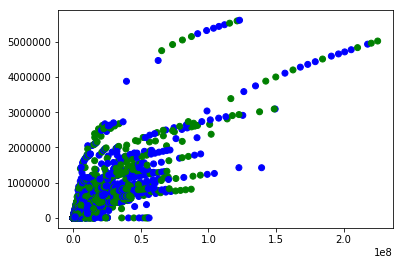

In [25]:
plt.scatter(Views,Likes,color=['blue','green'])
plt.show()

#### Testing if the means of Views and Dislikes are Statistically Significant Via BootStrap Resampling Technique

In [26]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(Views,Dislikes)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(Views,Dislikes,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)
print("P-Value is =",p)

P-Value is = 1.0


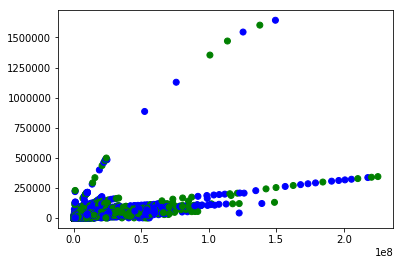

In [27]:
plt.scatter(Views,Dislikes,color=['blue','green'])
plt.show()

#### Means of Views and Dislikes are not Statistically different from each other.

#### Testing if the means of Views and Comment_Count are Statistically Significant Via BootStrap Resampling Technique

In [28]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(Views,Comment_Count)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(Views,Comment_Count,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)
print("P-Value is =",p)

P-Value is = 1.0


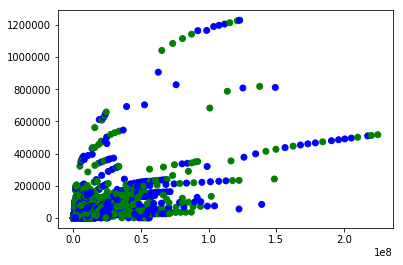

In [29]:
plt.scatter(Views,Comment_Count,color=['blue','green'])
plt.show()

##### Means of Views and Comment_Count are not Statistically different from each other.

#### Testing if the means of Likes and Comment_Count are Statistically Significant Via BootStrap Resampling Technique

In [30]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(Likes,Comment_Count)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(Likes,Comment_Count,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)
print("P-Value is =",p)

P-Value is = 1.0


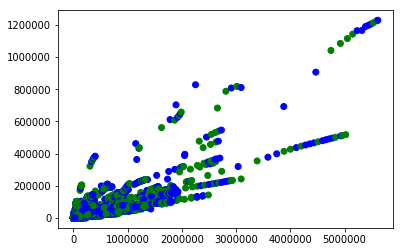

In [31]:
plt.scatter(Likes,Comment_Count,color=['blue','green'])
plt.show()

#### Means of Likes and Comment_Count are not Statistically different from each other.

#### Testing if the means of Likes and Dislikes are Statistically Significant Via BootStrap Resampling Technique

In [32]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(Likes,Dislikes)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(Likes,Dislikes,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)
print("P-Value is =",p)

P-Value is = 1.0


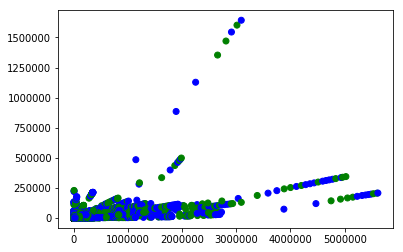

In [33]:
plt.scatter(Likes,Dislikes,color=['blue','green'])
plt.show()

##### Means of Likes and Dislikes are not Statistically different from each other.

#### Testing if the means of Dislikes and Comment Count are Statistically Significant Via BootStrap Resampling Technique

In [41]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(Dislikes,Comment_Count)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(Dislikes,Comment_Count,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)
print("P-Value is =",p)

P-Value is = 0.0


##### From the above test I have found out that the means of Dislikes and the Comment Count Numerical Features are are Statistically Significant.Hence, I shall validate this by performing a Paired Sample T-Test.

## Calculating the T-Statistic in order to validate that the difference in mean Dislikes and the Comment Count Numerical Features are are Statistically Significant.

In [45]:
## Import the packages
import numpy as np
from scipy import stats


Dislikes = df['dislikes'].values
Comment_Count = df['comment_count'].values

In [46]:
#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = Dislikes.var(ddof=1)
var_b = Comment_Count.var(ddof=1)

In [47]:
#Sample Size
N = len(df)

In [48]:
#std deviation
s = np.sqrt((var_a + var_b)/2)
s

29311.57629316542

In [49]:
## Calculate the t-statistics
t = (Dislikes.mean() - Comment_Count.mean())/(s*np.sqrt(2/N))

In [51]:
## Compare with the critical t-value
#Degrees of freedom
degreeFreedom = 2*N - 2


In [52]:
#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=degreeFreedom)

In [54]:
print("t = " + str(t))
print("p = " + str(2*p))
#Note that we multiply the p value by 2 because its a twp tail t-test
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.


## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(Dislikes,Comment_Count)
print("t = " + str(t2))
print("p = " + str(2*p2))


t = -23.152494045282975
p = 2.0
t = -23.152494045282975
p = 6.687829754488356e-118


###### It is quite clear from the low p-value we obtained that the Dislikes and Comment Count quantities are statistically Significant.  

## Perfoming another an independent T-Test to validate the Statistical Significance of the difference of means between the two quantities

In [13]:
from scipy import stats
from scipy.stats import ttest_rel

In [56]:
ttest_ind(df['dislikes'],df['comment_count'])

Ttest_indResult(statistic=-23.152494045282975, pvalue=3.343914877244178e-118)

#### After performing three tests simultaneously, it has been confirmed that Dislikes and Comment Count quantities are statistically Significant.